In [7]:
import numpy as np
import matplotlib.pyplot as plt
import iDEA
import pickle
import time
import ipywidgets as widgets
from IPython.display import display

# run variables

points = 100
num_of_states = 10

# initalise the system

l = 5
x = np.linspace(0, l, points)
dx = x[1] - x[0]
v_ext = np.zeros(len(x))
v_int = np.zeros([len(x), len(x)])
pib_single = iDEA.system.System(x, v_ext, v_int, electrons = "u")
pib_double = iDEA.system.System(x, v_ext, v_int, electrons = "ud")

# initalise the arrays

energies_from_interacting = []
energies_single_particle = []
energies_errors = []
occupied_levels_display = {} # displaying to terminal
occupied_levels = {} # for memory
time_array_text = []
time_array_num = []

# solve for the state and extract the energy
for i in range(num_of_states):
    start_time = time.perf_counter()
    print(f"Start state {i}")
    orbital_energy = []
    # # methods using pib_single
    s = iDEA.methods.interacting.solve(pib_single, k=i)
    energies_single_particle.append(np.round((s.energy / (np.pi)**2), decimals=4))

    # methods using pib_double
    j = iDEA.methods.interacting.solve(pib_double, k=i)
    # state_file_name = f"state{points}_{i}.pkl"
    # with open(state_file_name, "wb") as file:
    #   pickle.dump(j, file)

    energies_from_interacting.append(np.round((j.energy / (np.pi)**2), decimals=4))
    
    t = iDEA.methods.non_interacting.solve(pib_double, k=i)
    energies_up = np.round((t.up.energies / ((np.pi)**2)), decimals=4) # energies of single body state
    energies_down = np.round((t.down.energies / ((np.pi)**2)), decimals=4)
    up_occ_index = t.up.occupied # index of occupied orbitals
    down_occ_index = t.down.occupied
    # up_occ = t.up.occupations # full array of occupations
    # down_occ = t.down.occupations

    for index in up_occ_index:
        orbital_energy.append(energies_up[index])

    for index in down_occ_index:
        orbital_energy.append(energies_down[index])

    energy_sum = np.sum(orbital_energy)
    
    occupied_levels_display[f"State = {i}"] = (f"Orbitals occupied by up: {up_occ_index}", f"Orbitals occupied by down: {down_occ_index}", \
                                       f"Energy of occupied orbitals: {orbital_energy}", f"Total energy = {energy_sum}")
    occupied_levels[i] = [up_occ_index, down_occ_index, orbital_energy, energy_sum]
    
    
    # energies_errors.append(abs( ((i+1)**2) / (2*(l**2)) - np.round((s.energy / (np.pi)**2), decimals=4)))
    # energies_errors.append(abs( ((i+1)**2) / (2*((l+2*dx)**2)) - np.round((s.energy / (np.pi)**2), decimals=4))) # fix as discussed
    print(f"End state {i} done")
    end_time = time.perf_counter()
    print(f"Run time for state {i} = {end_time - start_time} s")
    time_array_text.append(f"Run time for state {i} = {end_time - start_time} s\n")
    time_array_num.append(end_time - start_time)
print("Done")

total_time = np.sum(time_array_num)

# with open('timings.txt', 'w') as file:
#     # Write each line to the file
#     for line in time_array_text:
#         file.write(line)
#     file.write(f"Total runtime: {total_time} s\n")
# file.close()


# file_name_1 = f"energies_int_{points}.pkl"
# file_name_2 = f"energies_single_{points}.pkl"
# file_name_3 = f"energies_errors.{points}.pkl"
# file_name_4 = f"occupied_levels.{points}.pkl"
# file_name_5 = f"occupied_info_{points}.pkl"

# with open(file_name_1, "wb") as file:
#     pickle.dump(energies_from_interacting, file)

# with open(file_name_2, "wb") as file:
#     pickle.dump(energies_single_particle, file)

# with open(file_name_3, "wb") as file:
#     pickle.dump(energies_errors, file)

# with open(file_name_4, "wb") as file:
#     pickle.dump(occupied_levels_display, file)

# with open(file_name_5, "wb") as file:
#     pickle.dump(occupied_levels, file)






Start state 0
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
TESTINGiDEA.methods.non_interacting.solve: convergence = 2.2162e-12, tolerance = 1e-10
End state 0 done
Run time for state 0 = 2.477685521000012 s
Start state 1
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
TESTINGiDEA.methods.non_interacting.solve: convergence = 2.2162e-12, tolerance = 1e-10
End state 1 done
Run time for state 1 = 2.22313976800001 s
Start state 2
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
TESTINGiDEA.methods.non_interacting.solve: convergence = 2.2162e-12, tolerance = 1e-10
End state 2 done
Run time for state 2 = 2.023795115999974 s
Start state 3
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
TESTINGiDEA.methods.non_interacting.solve: convergence =

In [8]:
for key, value in occupied_levels_display.items():
    print(f'{key}: {value}')
    print('---') 

State = 0: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [np.float64(0.0193), np.float64(0.0193)]', 'Total energy = 0.0386')
---
State = 1: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [1]', 'Energy of occupied orbitals: [np.float64(0.0193), np.float64(0.0772)]', 'Total energy = 0.0965')
---
State = 2: ('Orbitals occupied by up: [1]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [np.float64(0.0772), np.float64(0.0193)]', 'Total energy = 0.0965')
---
State = 3: ('Orbitals occupied by up: [1]', 'Orbitals occupied by down: [1]', 'Energy of occupied orbitals: [np.float64(0.0772), np.float64(0.0772)]', 'Total energy = 0.1544')
---
State = 4: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [2]', 'Energy of occupied orbitals: [np.float64(0.0193), np.float64(0.1737)]', 'Total energy = 0.193')
---
State = 5: ('Orbitals occupied by up: [2]', 'Orbitals occupied by down: [0]', 'Energy of occupied orb

In [9]:
print("Energies of interacting method 'ud'")
for i, value in enumerate(energies_from_interacting):
    print(f"State = {i}, energy = {value} per pi squared")
print("")
print("Energies of interacting method 'u'")
for i, value in enumerate(energies_single_particle):
    print(f"State = {i}, energy = {value} per pi squared")
print("")
print("Errors")
for i, value in enumerate(energies_errors):
    print(f"State = {i}, error = {value} per pi squared")

Energies of interacting method 'ud'
State = 0, energy = 0.0386 per pi squared
State = 1, energy = 0.0965 per pi squared
State = 2, energy = 0.0965 per pi squared
State = 3, energy = 0.1544 per pi squared
State = 4, energy = 0.193 per pi squared
State = 5, energy = 0.193 per pi squared
State = 6, energy = 0.2509 per pi squared
State = 7, energy = 0.2509 per pi squared
State = 8, energy = 0.3281 per pi squared
State = 9, energy = 0.3281 per pi squared

Energies of interacting method 'u'
State = 0, energy = 0.0193 per pi squared
State = 1, energy = 0.0772 per pi squared
State = 2, energy = 0.1737 per pi squared
State = 3, energy = 0.3088 per pi squared
State = 4, energy = 0.4825 per pi squared
State = 5, energy = 0.6948 per pi squared
State = 6, energy = 0.9456 per pi squared
State = 7, energy = 1.2351 per pi squared
State = 8, energy = 1.5632 per pi squared
State = 9, energy = 1.9299 per pi squared

Errors


In [10]:
# print the degenerate states

for i in range(len(energies_from_interacting)):
    if energies_from_interacting[i] == energies_from_interacting[i-1]:
        print(f"State {i-1} and {i} have the same energy {energies_from_interacting[i]}")

State 1 and 2 have the same energy 0.0965
State 4 and 5 have the same energy 0.193
State 6 and 7 have the same energy 0.2509
State 8 and 9 have the same energy 0.3281


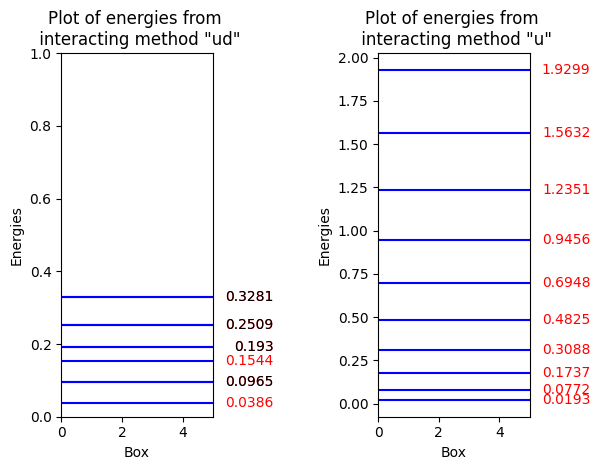

In [11]:
# plot the energies

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim(0, 5)
ax2.set_xlim(0, 5)
for i, value in enumerate(energies_from_interacting):
    ax1.axhline(y=value, color='b', linestyle='-')
    if energies_from_interacting[i] == energies_from_interacting[i-1]:
        ax1.text(x=7, y=value, s=f'{value}', color='black', va='center', ha='right')
    else:
        ax1.text(x=7, y=value, s=f'{value}', color='red', va='center', ha='right')

for i, value in enumerate(energies_single_particle):
    ax2.axhline(y=value, color='b', linestyle='-')
    ax2.text(x=7, y=value, s=f'{value}', color='red', va='center', ha='right')


ax1.set_title('Plot of energies from \n interacting method "ud"')
ax2.set_title('Plot of energies from \n interacting method "u"')
ax1.set_xlabel("Box")
ax1.set_ylabel("Energies")
ax2.set_xlabel("Box")
ax2.set_ylabel("Energies")
plt.tight_layout()
plt.savefig("pib_750_energy_levels.png")
plt.show()

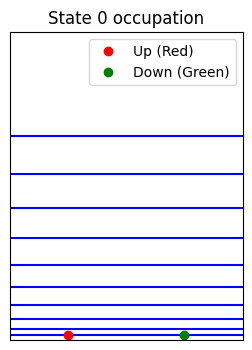

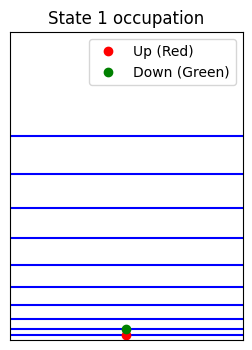

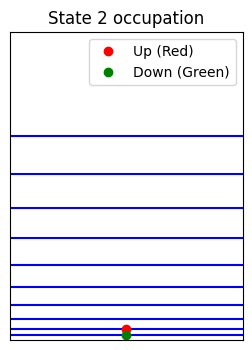

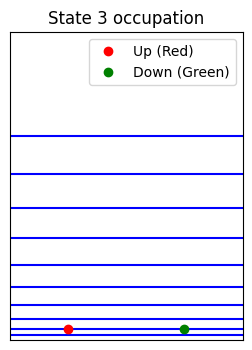

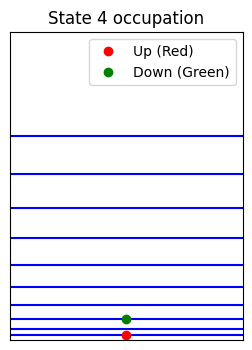

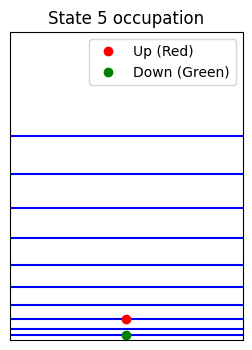

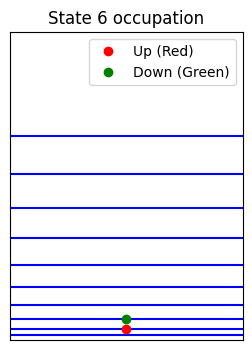

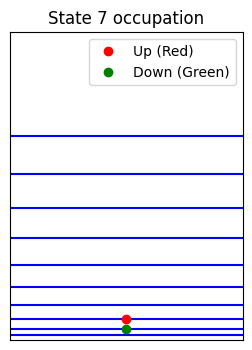

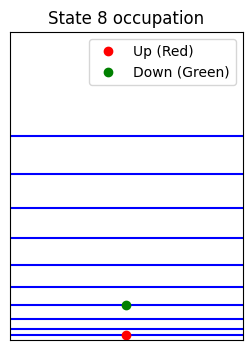

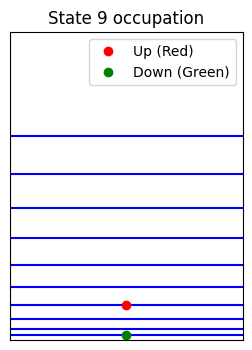

interactive(children=(IntSlider(value=5, description='k:', max=9), Output()), _dom_classes=('widget-interact',…

IntSlider(value=5, description='k:', max=9)

In [22]:
import os

# Ensure the directory for saving images exists
output_dir = 'frames'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def update_plot(k):
    plt.figure(figsize=(3, 4))
    plt.clf()

    # Plot horizontal lines and text for each value in energies_single
    for i, value in enumerate(energies_single_particle):
        plt.axhline(y=value, color='b', linestyle='-')
    
    # Plot the states and add them to the legend
    if occupied_levels[k][2][0] == occupied_levels[k][2][1]:
        plt.plot(0.25, occupied_levels[k][2][0], "ro", label='Up (Red)')
        plt.plot(0.75, occupied_levels[k][2][1], "go", label='Down (Green)')
    else:
        plt.plot(0.5, occupied_levels[k][2][0], "ro", label='Up (Red)')
        plt.plot(0.5, occupied_levels[k][2][1], "go", label='Down (Green)')

    plt.xlim(0, 1)
    plt.ylim(min(energies_single_particle) - 0.05 , max(energies_single_particle) + 1)
    plt.title(f"State {k} occupation")

    # Add a legend to the plot
    plt.legend(loc='upper right')
    # Remove the x and y axis numbers
    plt.xticks([])
    plt.yticks([])
    # Save the figure as a PNG file
    plt.savefig(os.path.join(output_dir, f'frame_{k:03d}.png'))
    plt.show()

# Generate and save each frame
for k in range(len(occupied_levels)):
    update_plot(k)

# Create a slider widget
k_slider = widgets.IntSlider(value=5, min=0, max=len(occupied_levels) - 1, step=1, description='k:')

# Update the plot when the slider value changes
widgets.interact(update_plot, k=k_slider)

# Display the slider
display(k_slider)